https://scipy-lectures.org/advanced/image_processing/

In [5]:
import numpy as np
from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering

In [7]:
l = 100

x, y = np.indices((l, l))

center1 = (28, 24)

center2 = (40, 50)

center3 = (67, 58)

center4 = (24, 70)

radius1, radius2, radius3, radius4 = 16, 14, 15, 14

circle1 = (x - center1[0])**2 + (y - center1[1])**2 < radius1**2

circle2 = (x - center2[0])**2 + (y - center2[1])**2 < radius2**2

circle3 = (x - center3[0])**2 + (y - center3[1])**2 < radius3**2

circle4 = (x - center4[0])**2 + (y - center4[1])**2 < radius4**2

# 4 circles

img = circle1 + circle2 + circle3 + circle4

mask = img.astype(bool)

img = img.astype(float)
img

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [8]:
img += 1 + 0.2*np.random.randn(*img.shape)
img

array([[0.87093011, 1.33528029, 0.73712741, ..., 0.88719226, 0.95650876,
        0.79716404],
       [1.36738034, 0.95544437, 0.93628372, ..., 1.51626334, 0.87328414,
        1.26153761],
       [1.39091181, 0.86418792, 1.03040006, ..., 1.09197895, 1.24677042,
        0.97697428],
       ...,
       [0.67289974, 1.00648264, 1.09038287, ..., 1.15768699, 0.74074401,
        0.87712765],
       [1.13219344, 0.48168783, 1.09105887, ..., 0.98455725, 0.9891682 ,
        0.9379188 ],
       [1.46431791, 1.06314204, 1.19529657, ..., 1.19767796, 1.06860069,
        1.30659861]])

In [9]:
# Convert the image into a graph with the value of the gradient on

# the edges.

graph = image.img_to_graph(img, mask=mask)
graph

<2678x2678 sparse matrix of type '<class 'numpy.float64'>'
	with 13004 stored elements in COOrdinate format>

In [6]:
# Take a decreasing function of the gradient: we take it weakly

# dependant from the gradient the segmentation is close to a voronoi

graph.data = np.exp(-graph.data/graph.data.std())

labels = spectral_clustering(graph, n_clusters=4, eigen_solver='arpack')

label_im = -np.ones(mask.shape)

label_im[mask] = labels

## 2.6.6. Measuring objects properties: ndimage.measurements

In [14]:
from scipy import ndimage 
import matplotlib.pyplot as plt

In [12]:
n = 10
l = 256
im = np.zeros((l, l))
points = l*np.random.random((2, n**2))
im[(points[0]).astype(np.int), (points[1]).astype(np.int)] = 1
im = ndimage.gaussian_filter(im, sigma=l/(4.*n))
mask = im > im.mean()

C:\Users\User\AppData\Local\Temp\ipykernel_24932\336713393.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  im[(points[0]).astype(np.int), (points[1]).astype(np.int)] = 1


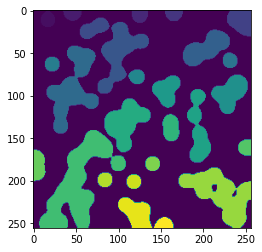

In [15]:
label_im, nb_labels = ndimage.label(mask)
nb_labels # how many regions?

plt.imshow(label_im)

C:\Users\User\AppData\Local\Temp\ipykernel_24932\3433773850.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  im[(points[0]).astype(np.int), (points[1]).astype(np.int)] = 1


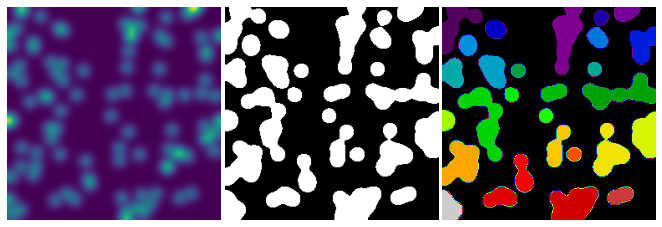

In [16]:
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt

np.random.seed(1)
n = 10
l = 256
im = np.zeros((l, l))
points = l*np.random.random((2, n**2))
im[(points[0]).astype(np.int), (points[1]).astype(np.int)] = 1
im = ndimage.gaussian_filter(im, sigma=l/(4.*n))

mask = im > im.mean()

label_im, nb_labels = ndimage.label(mask)

plt.figure(figsize=(9,3))

plt.subplot(131)
plt.imshow(im)
plt.axis('off')
plt.subplot(132)
plt.imshow(mask, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(133)
plt.imshow(label_im, cmap=plt.cm.nipy_spectral)
plt.axis('off')

plt.subplots_adjust(wspace=0.02, hspace=0.02, top=1, bottom=0, left=0, right=1)
plt.show()

In [22]:
from os import getcwd
from PIL import Image
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
from vae_weather import display_img_Gaussian, get_gaussian_img

In [18]:
# Récupère le répertoire du programme
file_path = getcwd() + "\\"
file_path

'c:\\Users\\User\\WORK\\workspace-ia\\PROJETS\\vae_weather_picture\\ara_training\\'

In [23]:
source_data_path = file_path.replace("ara_training", "dataset")
source_data_path

'c:\\Users\\User\\WORK\\workspace-ia\\PROJETS\\vae_weather_picture\\dataset\\'

In [ ]:
np.random.seed(1)

In [24]:
img_name = "cloudy1.jpg"

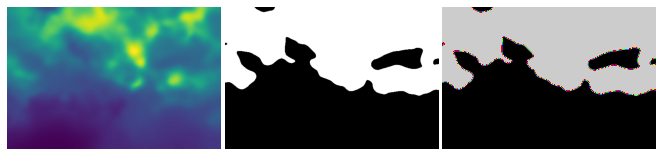

In [32]:
display_img_Gaussian(im)